In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns

### load dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/final-project-tesis/DATA/DATA_NEW.csv', encoding='utf-8')
df1 = dff[['HR_KUBIOS',	'HR_BEATS',	'RR_MS', 'RMSSD',	'STD_HR',	'STD_RR','VLF_MS2','LF_MS2', 'TOTAL_MS2','LF_PER_HF','VLF_HZ','LF_HZ','HF_HZ','LF_NU','HF_NU', 'class'	]]
df1.head()

,HR_KUBIOS,HR_BEATS,RR_MS,RMSSD,STD_HR,STD_RR,VLF_MS2,LF_MS2,TOTAL_MS2,LF_PER_HF,VLF_HZ,LF_HZ,HF_HZ,LF_NU,HF_NU,class
0,58.770,58.77,1021.66,30.930,1.731,28.33,1.32,2.96,7.17,1.03,0.03,0.06,0.31,50.66,49.34,1
1,60.310,60.48,994.72,62.190,3.270,49.91,0.61,2.47,14.28,0.22,0.03,0.14,0.17,18.10,81.90,1
2,61.114,61.17,981.76,26.855,1.820,29.94,0.53,6.37,8.16,5.03,0.03,0.09,0.22,83.43,16.57,1
3,59.710,59.71,1004.78,10.870,0.540,9.26,0.00,0.42,0.59,2.43,0.00,0.09,0.31,70.87,29.13,1
4,77.480,77.48,774.34,7.970,0.490,4.95,0.00,0.01,0.09,0.13,0.00,0.06,0.35,11.40,88.60,1


### normalisasi

In [ ]:
#function of normalization
def norm (x):
  #from sklearn import preprocessing
  import numpy as np
  hasil = (x-x.min())/(x.max()-x.min())
  return(hasil)

In [ ]:
# normalisasi data
df = norm(df1)
# menampilkan data
df.head()

,HR_KUBIOS,HR_BEATS,RR_MS,RMSSD,STD_HR,STD_RR,VLF_MS2,LF_MS2,TOTAL_MS2,LF_PER_HF,VLF_HZ,LF_HZ,HF_HZ,LF_NU,HF_NU,class
0,0.144780,0.206826,0.499039,0.019620,0.010583,0.023927,0.025162,0.013954,0.007428,0.055948,0.75,0.181818,0.64,0.534106,0.465894,1.0
1,0.153873,0.213289,0.480546,0.039449,0.019991,0.042154,0.011628,0.011644,0.014793,0.011950,0.75,0.909091,0.08,0.190828,0.809172,1.0
2,0.158621,0.215897,0.471650,0.017035,0.011127,0.025287,0.010103,0.030030,0.008453,0.273221,0.75,0.454545,0.28,0.879599,0.120401,1.0
3,0.150331,0.210379,0.487452,0.006895,0.003301,0.007821,0.000000,0.001980,0.000611,0.131993,0.00,0.454545,0.64,0.747180,0.252820,1.0
4,0.255255,0.277545,0.329270,0.005056,0.002996,0.004181,0.000000,0.000047,0.000093,0.007061,0.00,0.181818,0.80,0.120190,0.879810,1.0


In [ ]:
df.min()

HR_KUBIOS    0.0
HR_BEATS     0.0
RR_MS        0.0
RMSSD        0.0
STD_HR       0.0
STD_RR       0.0
VLF_MS2      0.0
LF_MS2       0.0
TOTAL_MS2    0.0
LF_PER_HF    0.0
VLF_HZ       0.0
LF_HZ        0.0
HF_HZ        0.0
LF_NU        0.0
HF_NU        0.0
class        0.0
dtype: float64

In [ ]:
df.max()

HR_KUBIOS    1.0
HR_BEATS     1.0
RR_MS        1.0
RMSSD        1.0
STD_HR       1.0
STD_RR       1.0
VLF_MS2      1.0
LF_MS2       1.0
TOTAL_MS2    1.0
LF_PER_HF    1.0
VLF_HZ       1.0
LF_HZ        1.0
HF_HZ        1.0
LF_NU        1.0
HF_NU        1.0
class        1.0
dtype: float64

In [ ]:
dfx1 = df[['HR_KUBIOS',	'HR_BEATS',	'RR_MS', 'RMSSD',	'STD_HR',	'STD_RR','VLF_MS2','LF_MS2', 'TOTAL_MS2','LF_PER_HF','VLF_HZ','LF_HZ','HF_HZ','LF_NU','HF_NU']]
dfy = df[['class']].values

### T-test Pearson Corelation

##### select significant features

In [ ]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

In [ ]:

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = df['HR_KUBIOS']
data2 = df['HR_BEATS'].values
data3 = df['RR_MS'].values
data4 = df['RMSSD'].values
data5 = df[	'STD_HR'].values
data6 = df['STD_RR'].values
data7 = df['VLF_MS2'].values
data8 = df['LF_MS2'].values
data9 = df[ 'TOTAL_MS2'].values
data10 = df['LF_PER_HF'].values
data11= df[ 'VLF_HZ'].values
data12= df[ 'LF_HZ'].values
data13= df['HF_HZ'].values
data14= df['LF_NU'].values
data15= df['HF_NU'].values


In [ ]:
# calculate Pearson's correlation
corr1,_ = pearsonr(data1, dfy)
print('Pearsons correlation data1: %.3f' % corr1)

# calculate Pearson's correlation
corr2,_ = pearsonr(data2, dfy)
print('Pearsons correlation data2: %.3f' % corr2)

# calculate Pearson's correlation
corr3,_ = pearsonr(data3, dfy)
print('Pearsons correlation data3: %.3f' % corr3)

# calculate Pearson's correlation
corr4,_ = pearsonr(data4, dfy)
print('Pearsons correlation data4: %.3f' % corr4)

# calculate Pearson's correlation
corr5,_ = pearsonr(data5, dfy)
print('Pearsons correlation data5: %.3f' % corr5)

# calculate Pearson's correlation
corr6,_ = pearsonr(data6, dfy)
print('Pearsons correlation data6: %.3f' % corr6)

# calculate Pearson's correlation
corr7,_ = pearsonr(data7, dfy)
print('Pearsons correlation data7: %.3f' % corr7)

# calculate Pearson's correlation
corr8,_ = pearsonr(data8, dfy)
print('Pearsons correlation data8: %.3f' % corr8)

# calculate Pearson's correlation
corr9,_ = pearsonr(data9, dfy)
print('Pearsons correlation data9: %.3f' % corr9)

# calculate Pearson's correlation
corr10,_ = pearsonr(data10, dfy)
print('Pearsons correlation data10: %.3f' % corr10)

# calculate Pearson's correlation
corr11,_ = pearsonr(data11, dfy)
print('Pearsons correlation data11: %.3f' % corr11)

# calculate Pearson's correlation
corr12,_ = pearsonr(data12, dfy)
print('Pearsons correlation data12: %.3f' % corr12)

# calculate Pearson's correlation
corr13,_ = pearsonr(data13, dfy)
print('Pearsons correlation data13: %.3f' % corr13)

# calculate Pearson's correlation
corr14,_ = pearsonr(data14, dfy)
print('Pearsons correlation data14: %.3f' % corr14)

# calculate Pearson's correlation
corr15,_ = pearsonr(data15, dfy)
print('Pearsons correlation data15: %.3f' % corr15)

Pearsons correlation data1: 0.139
Pearsons correlation data2: 0.145
Pearsons correlation data3: -0.073
Pearsons correlation data4: 0.101
Pearsons correlation data5: 0.148
Pearsons correlation data6: 0.100
Pearsons correlation data7: 0.131
Pearsons correlation data8: 0.037
Pearsons correlation data9: 0.061
Pearsons correlation data10: 0.046
Pearsons correlation data11: 0.130
Pearsons correlation data12: -0.073
Pearsons correlation data13: -0.071
Pearsons correlation data14: 0.092
Pearsons correlation data15: -0.092


In [ ]:
result = { 'feature' :['HR_KUBIOS',	'HR_BEATS',	'RR_MS', 'RMSSD',	'STD_HR',	'STD_RR','VLF_MS2','LF_MS2', 'TOTAL_MS2','LF_PER_HF','VLF_HZ','LF_HZ','HF_HZ','LF_NU','HF_NU'],
        'correlation':(corr1, corr2, corr3, corr4, corr5, corr6, corr7, corr8, corr9, corr10, corr11, corr12, corr13, corr14, corr15)}
dfn= pd.DataFrame(result)
dfn

,feature,correlation
0,HR_KUBIOS,[0.13903419311554457]
1,HR_BEATS,[0.14455272855853005]
2,RR_MS,[-0.07252564756952347]
3,RMSSD,[0.10122225864548952]
4,STD_HR,[0.14818355899198388]
5,STD_RR,[0.09979916511556458]
6,VLF_MS2,[0.13104368149076268]
7,LF_MS2,[0.03724841170500973]
8,TOTAL_MS2,[0.06104959173197094]
9,LF_PER_HF,[0.046057132729959746]


In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/final-project-tesis/CORR/corr.csv')
dat

,feature,corelasi
0,HR_KUBIOS,0.139034
1,HR_BEATS,0.144553
2,RR_MS,0.072526
3,RMSSD,0.101222
4,STD_HR,0.148184
5,STD_RR,0.099799
6,VLF_MS2,0.131044
7,LF_MS2,0.037248
8,TOTAL_MS2,0.061050
9,LF_PER_HF,0.046057


In [ ]:
dat.sort_values(by=['corelasi'])

,feature,corelasi
7,LF_MS2,0.037248
9,LF_PER_HF,0.046057
8,TOTAL_MS2,0.061050
12,HF_HZ,0.071467
2,RR_MS,0.072526
11,LF_HZ,0.073391
13,LF_NU,0.091899
14,HF_NU,0.091991
5,STD_RR,0.099799
3,RMSSD,0.101222


In [ ]:
rf = dat[dat['corelasi'] > 0.087]
rf.sort_values(by=['corelasi'], ascending=False)

,feature,corelasi
4,STD_HR,0.148184
1,HR_BEATS,0.144553
0,HR_KUBIOS,0.139034
6,VLF_MS2,0.131044
10,VLF_HZ,0.129800
3,RMSSD,0.101222
5,STD_RR,0.099799
14,HF_NU,0.091991
13,LF_NU,0.091899


####  correlation between input features

In [ ]:
dfx = df[['STD_HR','HR_BEATS','HR_KUBIOS','VLF_MS2','VLF_HZ','RMSSD',	'STD_RR','HF_NU','LF_NU']]
dfx.head()

,STD_HR,HR_BEATS,HR_KUBIOS,VLF_MS2,VLF_HZ,RMSSD,STD_RR,HF_NU,LF_NU
0,0.010583,0.206826,0.144780,0.025162,0.75,0.019620,0.023927,0.465894,0.534106
1,0.019991,0.213289,0.153873,0.011628,0.75,0.039449,0.042154,0.809172,0.190828
2,0.011127,0.215897,0.158621,0.010103,0.75,0.017035,0.025287,0.120401,0.879599
3,0.003301,0.210379,0.150331,0.000000,0.00,0.006895,0.007821,0.252820,0.747180
4,0.002996,0.277545,0.255255,0.000000,0.00,0.005056,0.004181,0.879810,0.120190


In [ ]:
dfx.astype('float64')

,STD_HR,HR_BEATS,HR_KUBIOS,VLF_MS2,VLF_HZ,RMSSD,STD_RR,HF_NU,LF_NU
0,0.010583,0.206826,0.144780,0.025162,0.75,0.019620,0.023927,0.465894,0.534106
1,0.019991,0.213289,0.153873,0.011628,0.75,0.039449,0.042154,0.809172,0.190828
2,0.011127,0.215897,0.158621,0.010103,0.75,0.017035,0.025287,0.120401,0.879599
3,0.003301,0.210379,0.150331,0.000000,0.00,0.006895,0.007821,0.252820,0.747180
4,0.002996,0.277545,0.255255,0.000000,0.00,0.005056,0.004181,0.879810,0.120190
...,...,...,...,...,...,...,...,...,...
431,0.003485,0.216502,0.159896,0.000381,1.00,0.009439,0.007703,0.647760,0.352240
432,0.003118,0.220660,0.166332,0.000000,0.00,0.006343,0.006630,0.850817,0.149183
433,0.003240,0.221114,0.167100,0.023828,1.00,0.008602,0.006993,0.606853,0.393147
434,0.003485,0.217296,0.161077,0.021921,1.00,0.038441,0.007779,0.405904,0.594096


In [ ]:
dfx.dtypes

STD_HR       float64
HR_BEATS     float64
HR_KUBIOS    float64
VLF_MS2      float64
VLF_HZ       float64
RMSSD        float64
STD_RR       float64
HF_NU        float64
LF_NU        float64
dtype: object

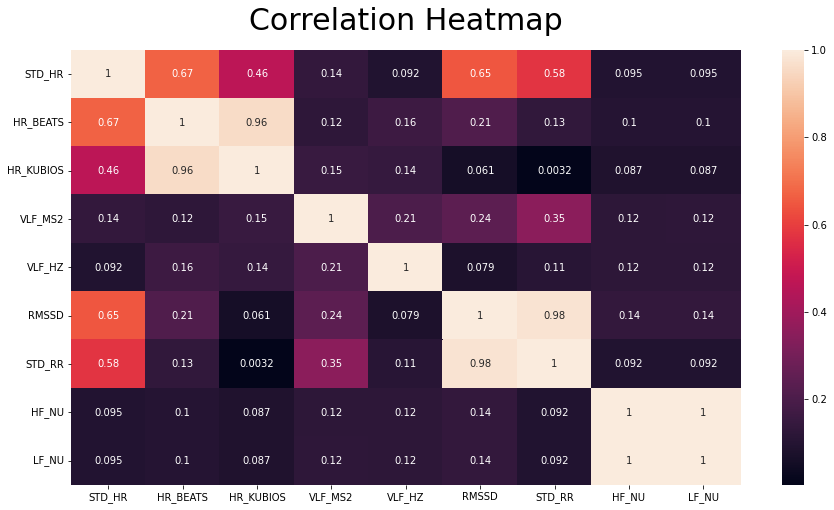

In [ ]:
correlation = dfx
correlation = correlation.corr()
corre = correlation.abs()
plt.figure(figsize=(15,8))
sns.heatmap(data=corre, annot=True)
plt.title('Correlation Heatmap', fontsize=30, pad=20)
plt.show()

#### removing process of redundant feature with α=0.5

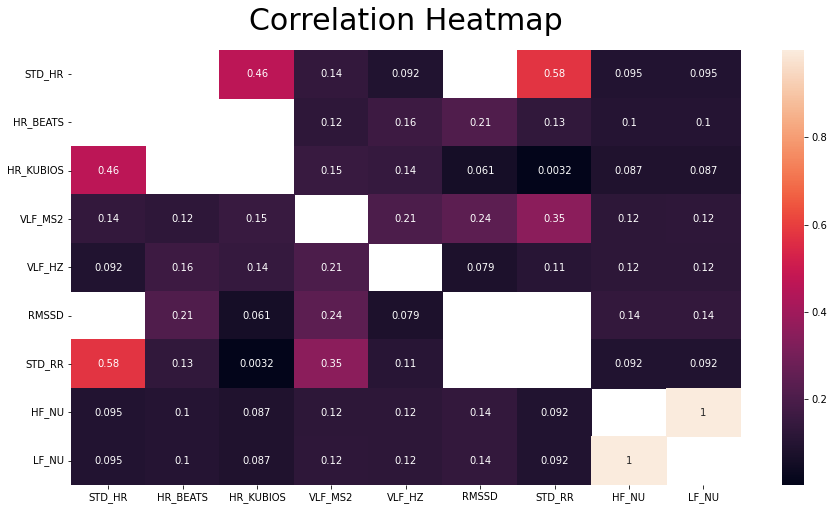

In [ ]:
rfa = correlation[correlation < 0.6]
rfa = rfa.abs()
plt.figure(figsize=(15,8))
sns.heatmap(data=rfa, annot=True)
plt.title('Correlation Heatmap', fontsize=30, pad=20)
plt.show()

no remove =  'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ'

### comparing kernel

In [ ]:
def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma) #dicoba sigmoid
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    '''print(pred_labels_tr)
    print(pred_labels_te)
    col1 = "pred-ytrain"
    col2 = "pred-ytest"
    df = pd.DataFrame({col1:pred_labels_tr})
    df.to_csv('pred-train-rbf', index=False)
    df1 = pd.DataFrame({col2:pred_labels_te})
    df1.to_csv('pred-test-rbf', index=False)'''

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

    

In [ ]:
c = 100
g = 40000

In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, c, g)

----- Evaluation on Test Data -----
Accuracy Score:  0.7954545454545454
              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69        35
         1.0       0.77      0.94      0.85        53

    accuracy                           0.80        88
   macro avg       0.82      0.76      0.77        88
weighted avg       0.81      0.80      0.78        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


#### variasi nilai-c

In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 10, 50000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.77      0.96      0.86        53

    accuracy                           0.81        88
   macro avg       0.84      0.77      0.78        88
weighted avg       0.83      0.81      0.80        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.985632183908046
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.98      0.98       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 50000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.77      0.96      0.86        53

    accuracy                           0.81        88
   macro avg       0.84      0.77      0.78        88
weighted avg       0.83      0.81      0.80        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1000, 50000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.77      0.96      0.86        53

    accuracy                           0.81        88
   macro avg       0.84      0.77      0.78        88
weighted avg       0.83      0.81      0.80        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 10000, 50000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.77      0.96      0.86        53

    accuracy                           0.81        88
   macro avg       0.84      0.77      0.78        88
weighted avg       0.83      0.81      0.80        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


#### variasi gama

In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 10, 10)

----- Evaluation on Test Data -----
Accuracy Score:  0.5681818181818182
              precision    recall  f1-score   support

         0.0       0.47      0.60      0.52        35
         1.0       0.67      0.55      0.60        53

    accuracy                           0.57        88
   macro avg       0.57      0.57      0.56        88
weighted avg       0.59      0.57      0.57        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7068965517241379
              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64       137
         1.0       0.77      0.74      0.75       211

    accuracy                           0.71       348
   macro avg       0.69      0.70      0.70       348
weighted avg       0.71      0.71      0.71       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 10, 50)

----- Evaluation on Test Data -----
Accuracy Score:  0.6136363636363636
              precision    recall  f1-score   support

         0.0       0.51      0.71      0.60        35
         1.0       0.74      0.55      0.63        53

    accuracy                           0.61        88
   macro avg       0.63      0.63      0.61        88
weighted avg       0.65      0.61      0.62        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7586206896551724
              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72       137
         1.0       0.84      0.74      0.79       211

    accuracy                           0.76       348
   macro avg       0.75      0.76      0.75       348
weighted avg       0.77      0.76      0.76       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 10, 100)

----- Evaluation on Test Data -----
Accuracy Score:  0.6363636363636364
              precision    recall  f1-score   support

         0.0       0.53      0.69      0.60        35
         1.0       0.74      0.60      0.67        53

    accuracy                           0.64        88
   macro avg       0.64      0.64      0.63        88
weighted avg       0.66      0.64      0.64        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7758620689655172
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       137
         1.0       0.84      0.77      0.81       211

    accuracy                           0.78       348
   macro avg       0.77      0.78      0.77       348
weighted avg       0.78      0.78      0.78       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 1000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7045454545454546
              precision    recall  f1-score   support

         0.0       0.66      0.54      0.59        35
         1.0       0.73      0.81      0.77        53

    accuracy                           0.70        88
   macro avg       0.69      0.68      0.68        88
weighted avg       0.70      0.70      0.70        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9482758620689655
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       137
         1.0       0.95      0.97      0.96       211

    accuracy                           0.95       348
   macro avg       0.95      0.94      0.95       348
weighted avg       0.95      0.95      0.95       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 1000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7045454545454546
              precision    recall  f1-score   support

         0.0       0.66      0.54      0.59        35
         1.0       0.73      0.81      0.77        53

    accuracy                           0.70        88
   macro avg       0.69      0.68      0.68        88
weighted avg       0.70      0.70      0.70        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9482758620689655
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       137
         1.0       0.95      0.97      0.96       211

    accuracy                           0.95       348
   macro avg       0.95      0.94      0.95       348
weighted avg       0.95      0.95      0.95       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 5000)

----- Evaluation on Test Data -----
Accuracy Score:  0.6931818181818182
              precision    recall  f1-score   support

         0.0       0.64      0.51      0.57        35
         1.0       0.72      0.81      0.76        53

    accuracy                           0.69        88
   macro avg       0.68      0.66      0.67        88
weighted avg       0.69      0.69      0.69        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 10000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7159090909090909
              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60        35
         1.0       0.73      0.83      0.78        53

    accuracy                           0.72        88
   macro avg       0.71      0.69      0.69        88
weighted avg       0.71      0.72      0.71        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 50000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.77      0.96      0.86        53

    accuracy                           0.81        88
   macro avg       0.84      0.77      0.78        88
weighted avg       0.83      0.81      0.80        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 100000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.73      0.98      0.84        53

    accuracy                           0.77        88
   macro avg       0.84      0.72      0.73        88
weighted avg       0.82      0.77      0.75        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 500000)

----- Evaluation on Test Data -----
Accuracy Score:  0.6931818181818182
              precision    recall  f1-score   support

         0.0       0.90      0.26      0.40        35
         1.0       0.67      0.98      0.79        53

    accuracy                           0.69        88
   macro avg       0.78      0.62      0.60        88
weighted avg       0.76      0.69      0.64        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 1000000)

----- Evaluation on Test Data -----
Accuracy Score:  0.6818181818181818
              precision    recall  f1-score   support

         0.0       0.89      0.23      0.36        35
         1.0       0.66      0.98      0.79        53

    accuracy                           0.68        88
   macro avg       0.77      0.60      0.58        88
weighted avg       0.75      0.68      0.62        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 5000000)

----- Evaluation on Test Data -----
Accuracy Score:  0.6590909090909091
              precision    recall  f1-score   support

         0.0       0.86      0.17      0.29        35
         1.0       0.64      0.98      0.78        53

    accuracy                           0.66        88
   macro avg       0.75      0.58      0.53        88
weighted avg       0.73      0.66      0.58        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


#### gama-detail

In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 10000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7159090909090909
              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60        35
         1.0       0.73      0.83      0.78        53

    accuracy                           0.72        88
   macro avg       0.71      0.69      0.69        88
weighted avg       0.71      0.72      0.71        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 20000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7613636363636364
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.66        35
         1.0       0.76      0.89      0.82        53

    accuracy                           0.76        88
   macro avg       0.76      0.73      0.74        88
weighted avg       0.76      0.76      0.75        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 30000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7613636363636364
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.66        35
         1.0       0.76      0.89      0.82        53

    accuracy                           0.76        88
   macro avg       0.76      0.73      0.74        88
weighted avg       0.76      0.76      0.75        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 40000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7954545454545454
              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69        35
         1.0       0.77      0.94      0.85        53

    accuracy                           0.80        88
   macro avg       0.82      0.76      0.77        88
weighted avg       0.81      0.80      0.78        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 50000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.77      0.96      0.86        53

    accuracy                           0.81        88
   macro avg       0.84      0.77      0.78        88
weighted avg       0.83      0.81      0.80        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 60000)

----- Evaluation on Test Data -----
Accuracy Score:  0.8068181818181818
              precision    recall  f1-score   support

         0.0       0.95      0.54      0.69        35
         1.0       0.76      0.98      0.86        53

    accuracy                           0.81        88
   macro avg       0.86      0.76      0.78        88
weighted avg       0.84      0.81      0.79        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 70000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7954545454545454
              precision    recall  f1-score   support

         0.0       0.95      0.51      0.67        35
         1.0       0.75      0.98      0.85        53

    accuracy                           0.80        88
   macro avg       0.85      0.75      0.76        88
weighted avg       0.83      0.80      0.78        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 80000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.73      0.98      0.84        53

    accuracy                           0.77        88
   macro avg       0.84      0.72      0.73        88
weighted avg       0.82      0.77      0.75        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 90000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.73      0.98      0.84        53

    accuracy                           0.77        88
   macro avg       0.84      0.72      0.73        88
weighted avg       0.82      0.77      0.75        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 100000)

----- Evaluation on Test Data -----
Accuracy Score:  0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.73      0.98      0.84        53

    accuracy                           0.77        88
   macro avg       0.84      0.72      0.73        88
weighted avg       0.82      0.77      0.75        88

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9885057471264368
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       137
         1.0       0.98      1.00      0.99       211

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

--------------------------------------------------------


### SVM BEFORE AND AFTER REMOVING FEATURE

#### build model

In [ ]:
def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='poly', probability=True, C=C, gamma=gamma) #dicoba sigmoid
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    '''print(pred_labels_tr)
    print(pred_labels_te)
    col1 = "pred-ytrain"
    col2 = "pred-ytest"
    df = pd.DataFrame({col1:pred_labels_tr})
    df.to_csv('pred-train-rbf', index=False)
    df1 = pd.DataFrame({col2:pred_labels_te})
    df1.to_csv('pred-test-rbf', index=False)'''

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

    

#### BEFORE REMOVING

In [ ]:
# Select data for model
X = dfx1

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, c, g)

#### AFTER REMOVING

In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR', 'RMSSD','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, c, g)

In [ ]:
# Select data for model
#X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ','LF_NU','HF_NU']]
X = df[[ 'HR_KUBIOS','HR_BEATS','RMSSD','STD_HR','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 100, 40000)

### dedicious tree

In [ ]:
X = df[[ 'HR_KUBIOS','HR_BEATS','STD_HR','STD_RR','VLF_MS2','VLF_HZ']]

#X=df.drop('class', axis=1, inplace=True)
y= dfy.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# function check metrix evalute
from sklearn.metrics import confusion_matrix, classification_report

def evaluation(name, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'{name.upper()} TRAINING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_train, y_train))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_train, y_train_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_train, y_train_pred))

    print('\n======================================================')

    print(f'\n {name.upper()} TESTING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_test, y_test))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_test, y_test_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'])
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [ ]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'])
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(splitter='best', random_state=0)
model_dt.fit(X_train, y_train)

In [ ]:
model_dict = {
    'Decision Tree' : model_dt
}

evaluate_model(model_dict)